# Neural Networks

In [1]:
import torch 

/Users/guilhermeperticarari/Desktop/venv/study/lib/python3.6/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Building Neural Network using PyTorch is very simple. 

First, we need to create our custom NeuralNetwork class with nn.Module as a parent class.

Your custom NeuralNetwork class will have to include:
- an **__init__(self)** constructor that calls the parent class' **__init__()** function
- a **self.forward(self, input)** function that applied the forward pass of the network

In [2]:
class NeuralNetwork(torch.nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.network = torch.nn.Sequential(
            torch.nn.Linear(5, 128),    # (w*x + b): from 5 neurons (input) to 128 neurons
            torch.nn.ReLU(),            # ReLU activation
            torch.nn.Linear(128, 512),  # (w*x + b): from 128 neurons to 512 neurons
            torch.nn.ReLU(),            # ReLU activation
            torch.nn.Linear(512, 10),   # (w*x + b): from 512 neurons to 10
            torch.nn.Softmax(dim=1) # dim=1 means that every row will sum to 100%.
                                    # dim=0 means that every column will sum to 100%
        )

    def forward(self, input):
        logit = self.network(input)
        return logit

In [3]:
# Initializing instance of the Neural Network class
model = NeuralNetwork()

# Creating a random input like [x1, x2, x3, x4, x5]
input = torch.rand((1,5))

# We should NEVER call the forward function directly. Just call model(input)
model(input)

tensor([[0.1180, 0.1004, 0.0947, 0.1022, 0.0962, 0.0952, 0.1065, 0.1003, 0.0950,
         0.0916]], grad_fn=<SoftmaxBackward0>)

Let's see what some pre-built NN layer in PyTorch do. 

Size of the image batch: torch.Size([3, 28, 28])


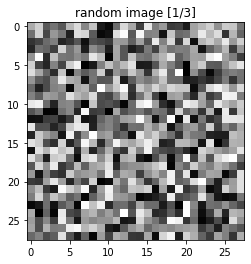

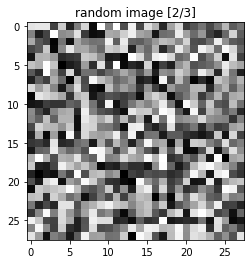

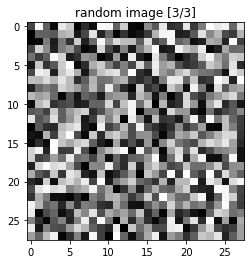

In [4]:
# We'll create a random tensor of type (3, 28, 28) that represents a batch of 3 (28, 28) images
image_batch = torch.rand(3, 28, 28) 
print(f'Size of the image batch: {image_batch.size()}')


import matplotlib.pyplot as plt

for i in range(3):
    fig = plt.figure()
    plt.title(f'random image [{i+1}/3]')
    plt.imshow(  image_batch[i], cmap='gray')
    plt.show()

In [5]:
torch.manual_seed(42)

In [6]:
# Flatten will convert each (28, 28) image to a (1, 784) tensor. Minibatch dimensions are kept.
flatten = torch.nn.Flatten()
flatten_image_batch = flatten(image_batch)

# Each row is the flattened version (784 columns) of each image in the batch
flatten_image_batch

tensor([[0.6721, 0.8061, 0.3495,  ..., 0.5051, 0.2129, 0.6805],
        [0.8912, 0.9012, 0.9021,  ..., 0.5599, 0.3207, 0.8865],
        [0.2767, 0.9867, 0.3822,  ..., 0.1393, 0.3640, 0.6173]])

In [7]:
# Linear will apply a linear transformation (w*x + b) to an input.
# The input and output dimensions need to be specified.
linear = torch.nn.Linear(784, 7)
linear_image_batch = linear(flatten_image_batch)

# Each row is the result of the linear transformation on the flattened version of each image in the batch
linear_image_batch

tensor([[-0.7324,  0.4194, -0.1462,  0.3569, -0.3217, -0.1682,  0.6785],
        [-0.7287,  0.2114, -0.0959,  0.3377, -0.4356,  0.0659,  0.7635],
        [-0.7578,  0.3597, -0.2605,  0.1875, -0.3180, -0.3312,  0.3829]],
       grad_fn=<AddmmBackward0>)

In [8]:
# ReLU will apply the ReLU activation function. ReLU(x) = max(0, x).
relu = torch.nn.ReLU()
relu_image_batch = relu(linear_image_batch)

relu_image_batch

tensor([[0.0000, 0.4194, 0.0000, 0.3569, 0.0000, 0.0000, 0.6785],
        [0.0000, 0.2114, 0.0000, 0.3377, 0.0000, 0.0659, 0.7635],
        [0.0000, 0.3597, 0.0000, 0.1875, 0.0000, 0.0000, 0.3829]],
       grad_fn=<ReluBackward0>)

In [9]:
linear_2 = torch.nn.Linear(7, 5)
linear_image_batch_2 = linear_2(relu_image_batch)

# Softmax will apply the softmax function row-wise (dim=1) or column-wise (dim=0)
softmax = torch.nn.Softmax(dim=1)
softmax_image_batch = softmax(linear_image_batch_2)

# Notice that each row sums to 100%.
# Each x[i,j] can be understood as the % of chance of image [i] being of class [j]
print(softmax_image_batch)

# We can use argmax() to find out which class is the most likely, which would be our model's prediction
print(softmax_image_batch.argmax(dim=1))

tensor([[0.2084, 0.1791, 0.1761, 0.1950, 0.2414],
        [0.2088, 0.1837, 0.1852, 0.1832, 0.2391],
        [0.1830, 0.1708, 0.1836, 0.2154, 0.2472]], grad_fn=<SoftmaxBackward0>)
tensor([4, 4, 4])


In [10]:
torch.manual_seed(42)
# Sequential is an ordered container for different NN layers.
# The inputs will be transformed according to the order of the layers.

sequential = torch.nn.Sequential(
    torch.nn.Flatten(),
    torch.nn.Linear(784, 7),
    torch.nn.ReLU(),
    torch.nn.Linear(7, 5),
    torch.nn.Softmax(dim=1)
)

sequential(image_batch)

# Notice that the values are the same as the separate steps above. 
# This is the case because:
#   1. We set the manual seed to the same state, so the weights and biases on the Linear layers are the same
#   . The operations are performed in the same sequence

tensor([[0.2084, 0.1791, 0.1761, 0.1950, 0.2414],
        [0.2088, 0.1837, 0.1852, 0.1832, 0.2391],
        [0.1830, 0.1708, 0.1836, 0.2154, 0.2472]], grad_fn=<SoftmaxBackward0>)